# Data Analysis

We have six datasets: 
1. Participant data
2. Participant task interaction data
3. Personality test of participants
4. Tasks
5. Post Study questionnaire data
6. Messages data

In [193]:
# Imports
import pandas as pd

## Pulling the data from Supabase

In [194]:
import csv
import requests

SUPABASE_URL = "https://vhuxlodxugpwodorwwzq.supabase.co"
SUPABASE_KEY = "sb_secret_iRWiJzUEwwbHNFA3A5LIUg_w_b9pmrh"

def export_table_to_csv(table_name: str, filename):
    """
    Export any Supabase table to a CSV file.
    
    Args:
        table_name (str): Name of the table to export.
        filename (str): Output CSV filename (defaults to <table_name>.csv).
    """
    if filename is None:
        filename = f"{table_name}.csv"

    url = f"{SUPABASE_URL}/rest/v1/{table_name}"
    headers = {
        "apikey": SUPABASE_KEY,
        "Authorization": f"Bearer {SUPABASE_KEY}",
        "Accept": "application/json"
    }

    # Fetch all rows
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching {table_name}: {response.status_code} {response.text}")
    
    rows = response.json()
    if not rows:
        print(f"No data found in {table_name}.")
        return

    # Write to CSV
    keys = rows[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Exported {len(rows)} rows from '{table_name}' to {filename}")

# Example usage
# export_table_to_csv("participant", 'participant.csv')      # saves to participant.csv
# export_table_to_csv("task", "tasks.csv") # saves to tasks.csv
# export_table_to_csv("participant_task_interaction", "participant_task_interaction.csv")
# export_table_to_csv("message", "message.csv")
# export_table_to_csv("personality_test", "personality_test.csv")
# export_table_to_csv("post_study_questions", "post_study_questions.csv")

## Participants Data Cleaning

In [195]:
participant = pd.read_csv('data/participant.csv')
participant = participant.drop(columns=['password'], axis=1)
participant.tail()


,id,created_at,name,email,age,gender,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity
85,82,2025-08-26T15:55:48.308759+00:00,Mehrunisa Usman,Musmann.141@gmail.com,28,female,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
86,85,2025-08-26T15:55:48.684252+00:00,Mehrunisa Usman,Musmann.141@gmail.com,28,female,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
87,88,2025-08-26T15:59:02.322283+00:00,Hafsa Usman,hafsausman260@gmail.com,25,female,post-secondary,none,pakistan,occasionally,fluent-c2,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': True, '3': False, '4': True, ..."
88,89,2025-08-26T16:32:21.172985+00:00,Mehrunisa Usman,musmann.141@gmail.com,28,female,university,management,pakistan,multiple-times,intermediate-b1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{}
89,90,2025-08-26T23:03:32.069968+00:00,Zainab Mushtaq,zainabniaz12@gmail.com,24,female,university,management,pakistan,rarely,fluent-c2,"[{'label': 'Learning / Studying', 'value': 'le...",True,"{'1': True, '2': True, '3': True, '4': True, '..."


In [196]:
print("total females:", participant.loc[participant['gender'] == 'female'].reset_index(drop=True).__len__())
print("total males:", participant.loc[participant['gender'] == 'male'].reset_index(drop=True).__len__())
print('Both includes duplicates')

total females: 42
total males: 48
Both includes duplicates


In [197]:
participant['gender'].unique()

array(['female', 'male'], dtype=object)

### Identifying deduplication

In [198]:
participant['email'] = participant['email'].str.lower().str.strip()
participant['name'] = participant['name'].str.lower().str.strip()

print(participant["name"].value_counts()[participant["name"].value_counts() > 1].__len__())
print(participant["email"].value_counts()[participant["email"].value_counts() > 1].__len__())

12
13


As some participants attempted the study more than once, we will still consider their prompts so we will merge them after we have imported and cleaned all the other datasets.

## Participant Task Interaction

In [199]:
participant_task_interaction = pd.read_csv('data/participant_task_interaction.csv')
participant_task_interaction.head()


,id,started_at,ended_at,ai_tool,participant_id,task_id
0,1,2025-08-11T16:43:46.321746+00:00,2025-08-11T16:43:46.588334+00:00,GPT-4o,1,1
1,2,2025-08-11T16:47:04.536261+00:00,NaN,GPT-4o,1,2
2,4,2025-08-11T16:48:39.841189+00:00,NaN,GPT-4o,1,3
3,5,2025-08-11T16:49:07.215491+00:00,NaN,GPT-4o,1,3
4,3,2025-08-11T16:48:15.553518+00:00,2025-08-11T16:49:21.11072+00:00,GPT-4o,1,3


## Messages

In [200]:
message = pd.read_csv('data/message.csv')
message.tail()

,id,created_at,interaction_id,sender,content
995,991,2025-08-26T16:09:36.07+00:00,496,user,add more plants and make it more victorian
996,992,2025-08-26T16:09:52.876+00:00,496,ai,/static/images/image_20250826_161017_474168_5a...
997,993,2025-08-26T16:10:28.467+00:00,497,user,"this is too much greenery, remove the greenery..."
998,994,2025-08-26T16:10:45.706+00:00,497,ai,/static/images/image_20250826_161111_624337_88...
999,995,2025-08-26T16:12:06.952+00:00,498,user,I have 4 apartment members and I need a plan t...


In [201]:
task = pd.read_csv('data/tasks.csv')
task.head()

,id,description,task_type,category,title
0,1,Describe one of your favorite moments from you...,image,Image Generation,Visualize a memory from your last vacation.
1,2,You recently moved into a new room and are see...,image,Image Generation,Design your room
2,3,Start by telling the AI about your roommates (...,text,Brainstorming,You share an apartment and want help dividing ...
3,4,"Describe your friend to the AI — personality, ...",text,Brainstorming,Buy a thoughtful birthday gift for your best f...
4,5,"Share your fitness goals, dietary preferences,...",text,Planning,Build a weekly fitness and meal plan tailored ...


## Handling Duplication

Merging across the datasets.

In [202]:
import numpy as np

# Step 1: Normalizing the email
participant["email_norm"] = participant["email"].str.strip().str.lower()

# Step 2: Building dedupe key
participant["dedupe_key"] = np.where(
    participant["email_norm"].notna(),
    participant["email_norm"],
    participant["name"].str.strip().str.lower() + "_" +
    participant["age"].astype(str) + "_" +
    participant["nationality"].str.strip().str.lower()
)

# Step 3: Sorting and picking a canonical row for each dedupe_key
participants_sorted = participant.sort_values("created_at")
canonical = participants_sorted.drop_duplicates(subset=["dedupe_key"], keep="first")

# Step 4: Mapping ALL old_ids to the canonical_id
id_map = {}
for key, group in participants_sorted.groupby("dedupe_key"):
    canonical_id = group.iloc[0]["id"]   # picking the first submission
    for pid in group["id"]:
        id_map[pid] = canonical_id

# Step 5: Reassigning interactions to canonical participant_id
participant_task_interaction["participant_id"] = participant_task_interaction["participant_id"].map(id_map)

# Step 6: now canonical is the deduplicated participant table
deduped = canonical.copy()

# Full dataset (deduped but not subsampled)
full_participants = deduped.copy()

# Step 7: Balancing genders
male_df = deduped[deduped["gender"].str.lower() == "male"]
female_df = deduped[deduped["gender"].str.lower() == "female"]

n_females = len(female_df)
balanced_male_df = male_df.sample(n=n_females, random_state=42)

subsampled_participants = pd.concat([balanced_male_df, female_df], ignore_index=True)
subsampled_participants = subsampled_participants.sample(frac=1, random_state=42).reset_index(drop=True)


print("Full dataset:")
print(full_participants["gender"].value_counts())

print("\nSubsampled dataset:")
print(subsampled_participants["gender"].value_counts())


Full dataset:
gender
male      35
female    14
Name: count, dtype: int64

Subsampled dataset:
gender
male      14
female    14
Name: count, dtype: int64


In [203]:
subsampled_participants.__len__()



28

# Analysis

Data restructuring with all data frames in a single dataframe.

In [204]:
def build_grouped_conversations(participants_df):
    # Merging participants task interaction with message
    merged_df = participant_task_interaction.merge(
        message,
        left_on="id",          
        right_on="interaction_id",  
        how="inner"
    )

    # Merging with task
    merged_df = merged_df.merge(
        task,
        left_on="task_id",
        right_on="id",
        how="inner",
        suffixes=("", "_task")
    )

    # Merging with participant (to bring gender + any other attributes)
    merged_df = merged_df.merge(
        participants_df,
        left_on="participant_id",
        right_on="id",
        how="inner",
        suffixes=("", "_participant")
    )

    # Sorting for chronological conversations
    merged_df = merged_df.sort_values(by=["participant_id", "task_id", "created_at"])

    # Grouping conversations per participant/task, but now gender is also available
    grouped_conversations = (
        merged_df.groupby(["participant_id", "gender", "task_id"])
        .apply(lambda x: [
            {"sender": row["sender"], "content": row["content"], "created_at": row["created_at"]}
            for _, row in x.iterrows()
        ])
        .reset_index(name="conversation")
    )

    return grouped_conversations, merged_df

grouped_full, merged_df_full = build_grouped_conversations(full_participants)
grouped_subsampled, merged_df_subsampled = build_grouped_conversations(subsampled_participants)


In [205]:
grouped_subsampled.tail()

,participant_id,gender,task_id,conversation
91,65,female,11,"[{'sender': 'user', 'content': 'Write a fictio..."
92,65,female,12,"[{'sender': 'user', 'content': 'i am fat and i..."
93,88,female,1,"[{'sender': 'user', 'content': 'Make me an ima..."
94,88,female,2,"[{'sender': 'user', 'content': 'Its a cozy roo..."
95,88,female,3,"[{'sender': 'user', 'content': 'I have 4 apart..."


### N by gender

In [206]:
print("Full dataset:")
print(merged_df_full.groupby('gender').count()['content'])

print("\nSubsampled dataset:")
print(merged_df_subsampled.groupby('gender').count()['content'])

Full dataset:
gender
female    132
male      868
Name: content, dtype: int64

Subsampled dataset:
gender
female    132
male      336
Name: content, dtype: int64


# Dependent Variables

## Prompt Length

In [207]:
def prompt_length(conv):
    return [len(msg["content"].split()) for msg in conv if msg["sender"] == "user"][0]


In [208]:
grouped_subsampled["prompt_length"] = grouped_subsampled["conversation"].apply(prompt_length)
grouped_full["prompt_length"] = grouped_full["conversation"].apply(prompt_length)


prompt_lengths = grouped_subsampled[['gender', 'prompt_length']]

In [209]:
prompt_lengths.head()

,gender,prompt_length
0,female,21
1,female,35
2,female,9
3,female,15
4,female,7


In [210]:
prompt_lengths.groupby('gender').mean()

,prompt_length
gender,
female,37.470588
male,29.919355


## Vocabular Variety (TTR)

In [211]:
def calc_ttr(conv):
    '''Distinct Words Ratio'''
    texts = [msg["content"] for msg in conv if msg["sender"] == "user"]
    words = " ".join(texts).split()
    return len(set(words)) / len(words) if words else 0


In [212]:
grouped_subsampled["ttr"] = grouped_subsampled["conversation"].apply(calc_ttr)
grouped_full["ttr"] = grouped_full["conversation"].apply(calc_ttr)


ttr = grouped_subsampled[['gender', 'ttr']]

In [213]:
ttr.head()

,gender,ttr
0,female,0.904762
1,female,0.914286
2,female,0.833333
3,female,1.000000
4,female,0.935484


In [214]:
ttr.groupby('gender').mean()

,ttr
gender,
female,0.790567
male,0.795662


## Emotion and Judgement Words

In [215]:

# Load NRC Emotion Lexicon
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                      names=["word", "emotion", "association"], 
                      sep="\t")

# Keep only associations where association == 1
lexicon = lexicon[lexicon["association"] == 1]

# Convert to dictionary: {word: [emotions]}
emotion_words = {}
for _, row in lexicon.iterrows():
    emotion_words.setdefault(row["word"], []).append(row["emotion"])

print(emotion_words)

def emotion_counts(conv):
    counts = {
        "anger": 0, "anticipation": 0, "disgust": 0, "fear": 0,
        "joy": 0, "negative": 0, "positive": 0, "sadness": 0,
        "surprise": 0, "trust": 0
    }
    for msg in conv:
        if msg["sender"] == "user":   # or "participant" depending on your mapping
            for w in msg["content"].lower().split():
                if w in emotion_words:
                    for emo in emotion_words[w]:
                        counts[emo] += 1
    return counts



{'abacus': ['trust'], 'abandon': ['fear', 'negative', 'sadness'], 'abandoned': ['anger', 'fear', 'negative', 'sadness'], 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'abba': ['positive'], 'abbot': ['trust'], 'abduction': ['fear', 'negative', 'sadness', 'surprise'], 'aberrant': ['negative'], 'aberration': ['disgust', 'negative'], 'abhor': ['anger', 'disgust', 'fear', 'negative'], 'abhorrent': ['anger', 'disgust', 'fear', 'negative'], 'ability': ['positive'], 'abject': ['disgust', 'negative'], 'abnormal': ['disgust', 'negative'], 'abolish': ['anger', 'negative'], 'abolition': ['negative'], 'abominable': ['disgust', 'fear', 'negative'], 'abomination': ['anger', 'disgust', 'fear', 'negative'], 'abort': ['negative'], 'abortion': ['disgust', 'fear', 'negative', 'sadness'], 'abortive': ['negative', 'sadness'], 'abovementioned': ['positive'], 'abrasion': ['negative'], 'abrogate': ['negative'], 'abrupt': ['surprise'], 'abscess': ['negative', 'sadness'], 'absence': ['fear

In [216]:
grouped_subsampled["emotion_counts"] = grouped_subsampled["conversation"].apply(emotion_counts)
grouped_full["emotion_counts"] = grouped_full["conversation"].apply(emotion_counts)


emotion_counts = grouped_subsampled[['gender', 'emotion_counts']]

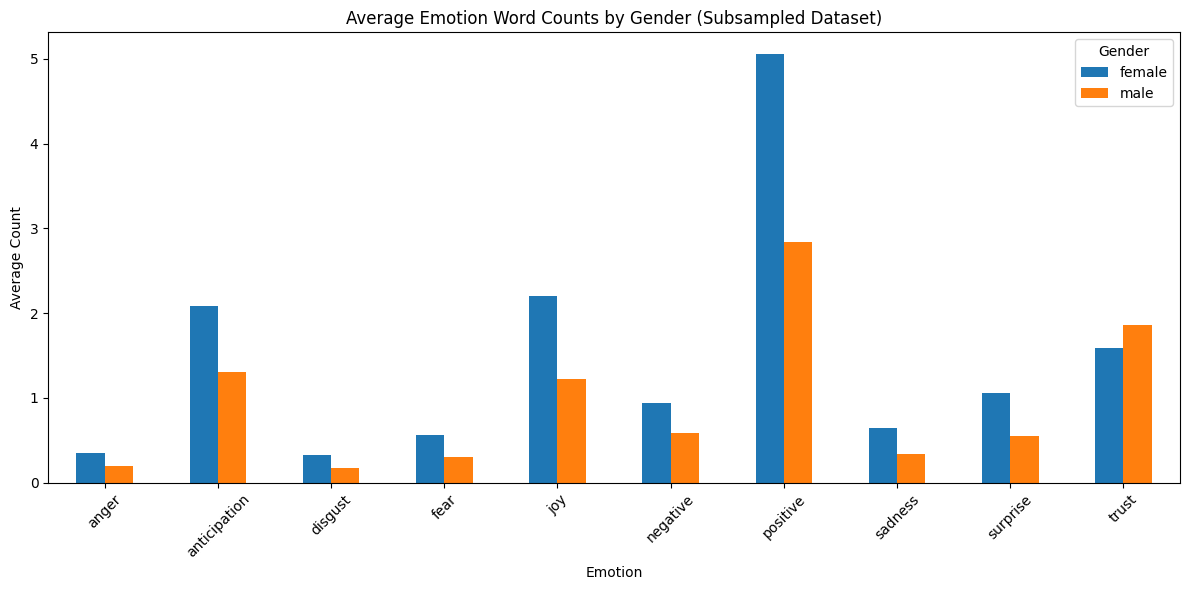

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

emotions_df = pd.json_normalize(emotion_counts['emotion_counts'])

# Merge with gender
df_expanded = pd.concat([emotion_counts['gender'], emotions_df], axis=1)

# Compute mean emotion counts by gender
mean_emotions = df_expanded.groupby("gender").mean()

# Plot
mean_emotions.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Emotion Word Counts by Gender (Subsampled Dataset)")
plt.ylabel("Average Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## Pronoun Usage

In [218]:
pronouns = {
    "first": {"i","me","my","we","us","our"},
    "second": {"you","your","yours"},
    "third": {"he","she","they","it","them","his","her","their"}
}

def pronoun_usage(conv):
    counts = {"first": 0, "second": 0, "third": 0}
    total = 0
    for msg in conv:
        if msg["sender"] == "user":
            words = msg["content"].lower().split()
            total += len(words)
            for w in words:
                for p in pronouns:
                    if w in pronouns[p]:
                        counts[p] += 1
    return {k: v/total if total else 0 for k,v in counts.items()}


In [219]:
grouped_subsampled["pronoun_usage"] = grouped_subsampled["conversation"].apply(pronoun_usage)
grouped_full["pronoun_usage"] = grouped_full["conversation"].apply(pronoun_usage)

pronoun_usage = grouped_subsampled[['gender', 'pronoun_usage']]

In [220]:
pronoun_usage.head()

,gender,pronoun_usage
0,female,"{'first': 0.0, 'second': 0.0, 'third': 0.04761..."
1,female,"{'first': 0.0, 'second': 0.0, 'third': 0.0}"
2,female,"{'first': 0.16666666666666666, 'second': 0.0, ..."
3,female,"{'first': 0.13333333333333333, 'second': 0.0, ..."
4,female,"{'first': 0.0967741935483871, 'second': 0.0, '..."


In [221]:
# Expanding the dicts in pronoun_usage into columns
expanded = pd.json_normalize(pronoun_usage['pronoun_usage'])

# Joining the gender with expanded values
df_expanded = pd.concat([pronoun_usage['gender'], expanded], axis=1)

df_expanded.groupby('gender')[['first', 'second', 'third']].mean()

,first,second,third
gender,,,
female,0.076257,0.002863,0.026075
male,0.052926,0.005735,0.020633


## Sentence Length

In [222]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab") 

def avg_sentence_length(conv):
    lengths = []
    for msg in conv:
        if msg["sender"] == "user":
            sentences = nltk.sent_tokenize(msg["content"])
            for s in sentences:
                lengths.append(len(s.split()))
    return sum(lengths)/len(lengths) if lengths else 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [223]:
grouped_subsampled["sentence_length"] = grouped_subsampled["conversation"].apply(avg_sentence_length)
grouped_full["sentence_length"] = grouped_full["conversation"].apply(avg_sentence_length)

sentence_length = grouped_subsampled[['gender', 'sentence_length']]

In [224]:
sentence_length.head()

,gender,sentence_length
0,female,21.000000
1,female,7.000000
2,female,8.000000
3,female,7.500000
4,female,4.428571


In [225]:
sentence_length.groupby("gender").mean().reset_index()

,gender,sentence_length
0,female,10.745462
1,male,14.725654


## Sentence Count

In [226]:
def sentence_count(conv):
    return sum(len(nltk.sent_tokenize(msg["content"])) for msg in conv if msg["sender"]=="user")


In [227]:
grouped_subsampled["sentence_count"] = grouped_subsampled["conversation"].apply(sentence_count)
grouped_full["sentence_count"] = grouped_full["conversation"].apply(sentence_count)

sentence_counts = grouped_subsampled[['gender', 'sentence_count']]
sentence_counts.head()

,gender,sentence_count
0,female,1
1,female,5
2,female,3
3,female,2
4,female,7


In [228]:
sentence_counts.groupby("gender").mean().reset_index()

,gender,sentence_count
0,female,6.000000
1,male,3.951613


## Phatic Expressions

In [229]:
phatic = {"hi","hello","thanks","thank you","bye"}

def contains_phatic(conv):
    return any(any(word in msg["content"].lower() for word in phatic) 
               for msg in conv if msg["sender"]=="user")


In [230]:
grouped_subsampled["phatic_expressions"] = grouped_subsampled["conversation"].apply(contains_phatic)
grouped_full["phatic_expressions"] = grouped_full["conversation"].apply(contains_phatic)

phatic_expressions = grouped_subsampled[['gender', 'phatic_expressions']]
phatic_expressions.head()

,gender,phatic_expressions
0,female,True
1,female,True
2,female,True
3,female,False
4,female,True


In [231]:
phatic_expressions.groupby("gender").mean().reset_index()

,gender,phatic_expressions
0,female,0.529412
1,male,0.451613


## Opinions (Subjectivity)

In [232]:
from textblob import TextBlob

def opinion_score(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return TextBlob(texts).sentiment.subjectivity if texts else 0


In [233]:
grouped_subsampled["opinion_score"] = grouped_subsampled["conversation"].apply(opinion_score)
grouped_full["opinion_score"] = grouped_full["conversation"].apply(opinion_score)

opinion_scores = grouped_subsampled[['gender', 'opinion_score']]
opinion_scores.head()

,gender,opinion_score
0,female,0.390000
1,female,0.241667
2,female,0.687500
3,female,1.000000
4,female,0.525983


In [234]:
opinion_scores.groupby("gender").mean().reset_index()

,gender,opinion_score
0,female,0.406108
1,male,0.389933


## Sentiment Score

In [235]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return analyzer.polarity_scores(texts)["compound"] if texts else 0


In [236]:
grouped_subsampled["sentiment"] = grouped_subsampled["conversation"].apply(sentiment)
grouped_full["sentiment"] = grouped_full["conversation"].apply(sentiment)

sentiment_scores = grouped_subsampled[['gender', 'sentiment']]
sentiment_scores.head()

,gender,sentiment
0,female,-0.3384
1,female,0.3612
2,female,0.0772
3,female,0.8225
4,female,0.6397


In [237]:
sentiment_scores.groupby("gender").mean().reset_index()

,gender,sentiment
0,female,0.541059
1,male,0.429366


## Iteration Count

In [238]:
def iteration_count(conv):
    return sum(1 for msg in conv if msg["sender"]=="user")


In [239]:
grouped_subsampled["iteration_count"] = grouped_subsampled["conversation"].apply(iteration_count)
grouped_full["iteration_count"] = grouped_full["conversation"].apply(iteration_count)

iteration_counts = grouped_subsampled[['gender', 'iteration_count']]
iteration_counts.head() 

,gender,iteration_count
0,female,1
1,female,1
2,female,3
3,female,1
4,female,2


In [240]:
iteration_counts.groupby("gender").mean().reset_index()

,gender,iteration_count
0,female,1.970588
1,male,2.709677


# Hypotheses

## Hypothesis a:
H1a. Female users are expected to use a higher frequency of emotion-laden vocabulary (e.g., emotion words, tentative expressions, and uncertain verbs), along with greater pronoun usage and phatic expressions, reflecting a more interpersonally-oriented and emotionally expressive style.

H0a. There will be no significant difference between prompts submitted by male and female users in terms of their lexical, syntactic, pragmatic, or interactional linguistic features.

### DVs to consider:
1. Vocabulary variety (TTR) 
2. Emotion and Judgement Words using NRC Emotion Lexicon file
3. Pronoun Usage


Since this is a group difference test, we compare distribution of DVs between male and female.
1. If DV is normal in both groups (and variances are homogeneous) → we will use t-test (parametric).
2. If DV is not normal in at least one group → we will use Mann–Whitney U test (nonparametric alternative to independent t-test).

###  Normality Test

We use the **Shapiro–Wilk test** to assess whether each dependent variable (DV) is normally distributed within each gender group. The decision rule is based on **α = 0.05**:

* If **p > 0.05** → data do not significantly deviate from normality (treated as normal).
* If **p ≤ 0.05** → data deviate significantly from normality (non-normal).
* If one group is non-normal, the DV is treated as **non-normal overall**.

#### Full Dataset Normality Test

In [241]:
import pandas as pd
from scipy.stats import shapiro

# Expanding dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_full['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_full['pronoun_usage'])

# Renaming the columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenating back to df
grouped_full = pd.concat([grouped_full.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Now the DVs are numeric columns:
dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third',
       'opinion_score', 'sentiment']

# Running Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_full['gender'].unique():
        data = grouped_full[grouped_full['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Printing results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8622600174065266, p=0.0005326206935005489
  male: W=0.9155596169507758, p=1.154481180830717e-09

DV: emo_anger
  female: W=0.6055549703353338, p=2.3141273630651455e-08
  male: W=0.5348959921345863, p=1.8338918671918628e-23

DV: emo_anticipation
  female: W=0.6447635806960221, p=7.73518854973605e-08
  male: W=0.7131350271850637, p=7.011491750110093e-19

DV: emo_disgust
  female: W=0.5563438595956915, p=5.648262052068159e-09
  male: W=0.4519604196667094, p=3.85278000468163e-25

DV: emo_fear
  female: W=0.5302480048604206, p=2.7861418230540727e-09
  male: W=0.5167231309495213, p=7.534085212492816e-24

DV: emo_joy
  female: W=0.7071914729217125, p=6.357477781020931e-07
  male: W=0.7403180147354483, p=5.290210200374581e-18

DV: emo_sadness
  female: W=0.5641701004680354, p=7.018757893768573e-09
  male: W=0.5819666049392614, p=2.0948431901826243e-22

DV: emo_surprise
  female: W=0.5320942352643985, p=2.92645518267203e-09
  male: W=0.5932300722236161, p=3.87021266881071

#### Subsampled Dataset Normality Test

In [242]:
# assume df is already loaded

# Expand dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_subsampled['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_subsampled['pronoun_usage'])

# Rename columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenate back to df
grouped_subsampled = pd.concat([grouped_subsampled.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Run Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_subsampled['gender'].unique():
        data = grouped_subsampled[grouped_subsampled['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Print results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8622600174065266, p=0.0005326206935005489
  male: W=0.9531201148738558, p=0.018906751247403975

DV: emo_anger
  female: W=0.6055549703353338, p=2.3141273630651455e-08
  male: W=0.35132195245034525, p=4.567023847126967e-15

DV: emo_anticipation
  female: W=0.6447635806960221, p=7.73518854973605e-08
  male: W=0.7682612919112108, p=1.6206002687589993e-08

DV: emo_disgust
  female: W=0.5563438595956915, p=5.648262052068159e-09
  male: W=0.4315228973429178, p=4.141096503170658e-14

DV: emo_fear
  female: W=0.5302480048604206, p=2.7861418230540727e-09
  male: W=0.5047441005019064, p=3.80550219153732e-13

DV: emo_joy
  female: W=0.7071914729217125, p=6.357477781020931e-07
  male: W=0.7526412522445458, p=7.192244152820986e-09

DV: emo_sadness
  female: W=0.5641701004680354, p=7.018757893768573e-09
  male: W=0.5771932850265094, p=4.352666674750012e-12

DV: emo_surprise
  female: W=0.5320942352643985, p=2.92645518267203e-09
  male: W=0.6436949779984009, p=5.34450007355028e

### Hypothesis A – Normality Results

#### Full Dataset

* **TTR (lexical diversity):** Females deviate significantly (p = 0.0005 < 0.05), and males also deviate (p < 0.001 < 0.05). → **Non-normal**.
* **Emotion words (anger, anticipation, disgust, fear, joy, sadness, surprise, trust):** All categories deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Pronouns (first, second, third):** All pronoun types deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.


**Conclusion (full dataset):** All dependent variables are treated as **non-normal overall**, requiring **Mann–Whitney U tests**.

---

#### Subsampled Dataset

* **TTR (lexical diversity):** Females deviate significantly (p = 0.0005 < 0.05), males approximate normality (p = 0.019 < 0.05 but close). Since one group fails → **Non-normal overall**.
* **Emotion words (anger, anticipation, disgust, fear, joy, sadness, surprise, trust):** All categories deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Pronouns (first, second, third):** All pronoun types deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.


**Conclusion (subsampled dataset):** As in the full dataset, **all dependent variables are treated as non-normal overall**.

### Mann-Whitney U test for Full Dataset

In [283]:
grouped_full.columns


Index(['participant_id', 'gender', 'task_id', 'conversation', 'prompt_length',
       'ttr', 'sentence_length', 'sentence_count', 'phatic_expressions',
       'opinion_score', 'sentiment', 'iteration_count', 'emo_anger',
       'emo_anticipation', 'emo_disgust', 'emo_fear', 'emo_joy',
       'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise',
       'emo_trust', 'pron_first', 'pron_second', 'pron_third'],
      dtype='object')

In [ ]:
from scipy.stats import mannwhitneyu, false_discovery_control
import numpy as np

def mann_whitney_test(dv, data, group_col='gender', alpha=0.05):
    """
    Enhanced Mann-Whitney U test with effect size and better reporting
    """
    male_vals = data[data[group_col] == "male"][dv].dropna()
    female_vals = data[data[group_col] == "female"][dv].dropna()
    # Run Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(male_vals, female_vals, alternative="two-sided")

    # Calculate effect sizes
    n1, n2 = len(male_vals), len(female_vals)

    # Rank-biserial correlation (primary effect size for Mann-Whitney U)
    rbc = 1 - (2 * u_stat) / (n1 * n2)

    # Alternative effect size: r (correlation coefficient approximation)
    z_score = (u_stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    r_effect = abs(z_score) / np.sqrt(n1 + n2)

    # Descriptive statistics
    male_median = male_vals.median()
    female_median = female_vals.median()
    male_mean = male_vals.mean()
    female_mean = female_vals.mean()

    results = {
        'variable': dv,
        'u_statistic': u_stat,
        'p_value': p_val,
        'rank_biserial_r': rbc,
        'effect_size_r': r_effect,
        'male_median': male_median,
        'female_median': female_median,
        'male_mean': male_mean,
        'female_mean': female_mean,
        'male_n': n1,
        'female_n': n2,
        'significant': p_val < alpha
    }

    return results

In [288]:
def interpret_effect_size(r):
    """
    Interpret effect size according to Cohen's conventions
    """
    if abs(r) < 0.1:
        return "negligible"
    elif abs(r) < 0.3:
        return "small"
    elif abs(r) < 0.5:
        return "medium"
    else:
        return "large"

In [277]:
hypothesis_a_dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third']

In [278]:
hypothesis_a_results = []
for dv in hypothesis_a_dvs:
    if dv in grouped_full.columns:
        result = mann_whitney_test(dv, grouped_full)
        hypothesis_a_results.append(result)

results_df_a = pd.DataFrame(hypothesis_a_results)
results_df_a.head()

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,ttr,4444.0,0.032294,-0.227285,0.135359,0.847826,0.799076,0.851311,0.790567,213,34,True
1,emo_anger,3236.0,0.185755,0.106324,0.063321,0.000000,0.000000,0.286385,0.352941,213,34,False
2,emo_anticipation,3061.0,0.122858,0.154653,0.092103,1.000000,1.000000,1.197183,2.088235,213,34,False
3,emo_disgust,3350.0,0.292808,0.074841,0.044571,0.000000,0.000000,0.201878,0.323529,213,34,False
4,emo_fear,3214.0,0.148094,0.112400,0.066939,0.000000,0.000000,0.319249,0.558824,213,34,False


In [279]:
results_df_a.loc[results_df_a['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,ttr,4444.0,0.032294,-0.227285,0.135359,0.847826,0.799076,0.851311,0.790567,213,34,True
13,pron_third,2602.5,0.002817,0.281276,0.167513,0.000000,0.019708,0.015217,0.026075,213,34,True


### Mann-Whitney U test for Subsampled Dataset

In [280]:
hypothesis_a_results_grouped_subsampled = []
for dv in hypothesis_a_dvs:
    if dv in grouped_subsampled.columns:
        result = mann_whitney_test(dv, grouped_subsampled)
        hypothesis_a_results_grouped_subsampled.append(result)

results_df_a_grouped_subsampled = pd.DataFrame(hypothesis_a_results_grouped_subsampled)
results_df_a_grouped_subsampled.head()

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,ttr,1044.5,0.944958,0.009013,0.007428,0.807355,0.799076,0.795662,0.790567,62,34,False
1,emo_anger,830.0,0.015184,0.212524,0.175139,0.000000,0.000000,0.193548,0.352941,62,34,True
2,emo_anticipation,937.5,0.350948,0.110531,0.091088,1.000000,1.000000,1.306452,2.088235,62,34,False
3,emo_disgust,953.5,0.248499,0.095351,0.078578,0.000000,0.000000,0.177419,0.323529,62,34,False
4,emo_fear,924.5,0.185576,0.122865,0.101252,0.000000,0.000000,0.306452,0.558824,62,34,False


In [281]:
results_df_a_grouped_subsampled.loc[results_df_a_grouped_subsampled['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
1,emo_anger,830.0,0.015184,0.212524,0.175139,0.0,0.0,0.193548,0.352941,62,34,True


### Hypothesis A – Results

#### Full Dataset

* **Vocabulary diversity (TTR):** Significant difference between genders (U = 4444.0, p = .032, r = –.227). Males show higher lexical diversity (Median = 0.85) compared to females (Median = 0.80).
* **Third-person pronouns:** Significant difference (U = 2602.5, p = .003, r = .281). Females use more third-person pronouns (Median = 0.02) than males (Median = 0.00).
* **Other variables** (emotion word categories, first- and second-person pronouns) do not differ significantly.

#### Subsampled Dataset

* **Anger-related words (emo\_anger):** Females use significantly more anger-related words (U = 830.0, p = .015, r = .213).
* **All other variables** (TTR, other emotion words, pronouns) show no significant gender differences.

#### Conclusion

* **Full dataset:** Significant differences are observed in TTR (higher for males) and third-person pronouns (higher for females).
* **Subsampled dataset:** Only anger-related word use differs significantly (higher for females).
* Hypothesis A is **partially supported**, but the exact effects depend on whether the full or subsampled dataset is analyzed.


## Hypothesis B:
H1b: Male prompts may contain fewer and shorter sentences, indicating a more direct approach.

H0b: There will be no significant gender-based differences in sentence structure.

### Dependent Variables
For Hypothesis B, the relevant dependent variables are measures of sentence structure:
- **Sentence Count**: the number of sentences per prompt.  
- **Average Sentence Length**: the average number of words per sentence.

#### Full Dataset Normality Test

In [268]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['sentence_count', 'sentence_length']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7352, p = 0.000002 (n=34)
    Male: W = 0.7954, p = 0.000000 (n=213)

DV: sentence_length
----------------------------------------
  Female: W = 0.9332, p = 0.038736 (n=34)
    Male: W = 0.7092, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [269]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7352, p = 0.000002 (n=34)
    Male: W = 0.8750, p = 0.000014 (n=62)

DV: sentence_length
----------------------------------------
  Female: W = 0.9332, p = 0.038736 (n=34)
    Male: W = 0.8060, p = 0.000000 (n=62)


### Hypothesis B – Normality Results

#### Full Dataset

* **Sentence count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.
* **Sentence length:** Females deviate (p = 0.039 < 0.05), males strongly deviate (p < 0.001 < 0.05). → **Non-normal**.

**Conclusion (full dataset):** Both sentence count and sentence length are **non-normal**.

---

#### Subsampled Dataset

* **Sentence count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.
* **Sentence length:** Females approximate normality (p = 0.039 \~ borderline < 0.05), males deviate strongly (p < 0.001 < 0.05). Since one group fails → **Non-normal overall**.

**Conclusion (subsampled dataset):** Both sentence count and sentence length are **non-normal**.

### Mann-Whitney U test for Full Dataset

In [271]:
# Running tests for Hypothesis B
hypothesis_b_dvs = ['sentence_count', 'sentence_length']
hypothesis_b_results = []
for dv in hypothesis_b_dvs:
    if dv in grouped_full.columns:
        result = mann_whitney_test(dv, grouped_full)
        hypothesis_b_results.append(result)
results_df_b = pd.DataFrame(hypothesis_b_results)
results_df_b['p_corrected_bh'] = false_discovery_control(results_df_b['p_value'].values)
results_df_b['p_corrected_bonf'] = np.minimum(
results_df_b['p_value'] * len(results_df_b), 1.0
)
results_df_b['effect_interpretation'] = results_df_b['effect_size_r'].apply(interpret_effect_size)
results_df_b['significant_bh'] = results_df_b['p_corrected_bh'] < 0.05
results_df_b['significant_bonf'] = results_df_b['p_corrected_bonf'] < 0.05
print("\n=== HYPOTHESIS B RESULTS ===")
results_df_b.round(4)


=== HYPOTHESIS B RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentence_count,2438.0,0.0017,0.3267,0.1946,2.0,5.0000,3.3380,6.0000,213,34,True,0.0034,0.0034,small,True,True
1,sentence_length,4507.0,0.0221,-0.2447,0.1457,12.2,10.0714,15.8206,10.7455,213,34,True,0.0221,0.0441,small,True,True


In [273]:
results_df_b.loc[results_df_b['significant_bh'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentence_count,2438.0,0.001724,0.326705,0.194568,2.0,5.000000,3.338028,6.000000,213,34,True,0.003449,0.003449,small,True,True
1,sentence_length,4507.0,0.022061,-0.244684,0.145721,12.2,10.071429,15.820590,10.745462,213,34,True,0.022061,0.044122,small,True,True


### Mann-Whitney U test for Subsampled Dataset

In [272]:
# Running tests for Hypothesis B
hypothesis_b_results_grouped_subsampled = []
for dv in hypothesis_b_dvs:
    if dv in grouped_subsampled.columns:
        result = mann_whitney_test(dv, grouped_subsampled)
        hypothesis_b_results_grouped_subsampled.append(result)
results_df_b_grouped_subsampled = pd.DataFrame(hypothesis_b_results_grouped_subsampled)
results_df_b_grouped_subsampled['p_corrected_bh'] = false_discovery_control(results_df_b_grouped_subsampled['p_value'].values)
results_df_b_grouped_subsampled['p_corrected_bonf'] = np.minimum(
    results_df_b_grouped_subsampled['p_value'] * len(results_df_b_grouped_subsampled), 1.0
)
results_df_b_grouped_subsampled['effect_interpretation'] = results_df_b_grouped_subsampled['effect_size_r'].apply(interpret_effect_size)
results_df_b_grouped_subsampled['significant_bh'] = results_df_b_grouped_subsampled['p_corrected_bh'] < 0.05
results_df_b_grouped_subsampled['significant_bonf'] = results_df_b_grouped_subsampled['p_corrected_bonf'] < 0.05
print("\n=== HYPOTHESIS B RESULTS ===")
results_df_b_grouped_subsampled.round(4)


=== HYPOTHESIS B RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentence_count,853.0,0.1210,0.1907,0.1572,3.0000,5.0000,3.9516,6.0000,62,34,False,0.1210,0.2420,small,False,False
1,sentence_length,1375.0,0.0141,-0.3046,0.2510,12.2556,10.0714,14.7257,10.7455,62,34,True,0.0281,0.0281,small,True,True


In [274]:
results_df_b_grouped_subsampled.loc[results_df_b_grouped_subsampled['significant_bh'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
1,sentence_length,1375.0,0.014053,-0.304554,0.25098,12.255556,10.071429,14.725654,10.745462,62,34,True,0.028106,0.028106,small,True,True


### Hypothesis B – Results

#### Full Dataset

* **Sentence count:** Females use significantly more sentences (Median = 5.00) than males (Median = 2.00) (U = 2438.0, p = .002, r = .327).
* **Sentence length:** Males write significantly longer sentences (Median = 12.20 words) compared to females (Median = 10.07 words) (U = 4507.0, p = .022, r = –.245).

#### Subsampled Dataset

* **Sentence count:** Females again use more sentences (Median = 5.00 vs. 3.00), but the difference is **not significant** (U = 853.0, p = .121, r = .191).
* **Sentence length:** Males write longer sentences (Median = 12.26 vs. 10.07), and the difference is **significant** (U = 1375.0, p = .014, r = –.305).

#### Conclusion

* Across both datasets, males consistently use longer sentences, while females tend to use more sentences.
* **Sentence length differences are robust** across both datasets, but **sentence count differences only reach significance in the full dataset**.
* Hypothesis B is **not supported**: instead of being shorter and fewer, male prompts are longer and sometimes fewer.


## Hypothesis C

**H1c:** Female prompts include more phatic expressions and subjective content.  
**H0c:** There is no significant gender-based difference in phatic expression or subjectivity.

### Dependent Variables
- **Opinion Score (TextBlob subjectivity)** – how subjective vs objective the prompt is.  
- **Sentiment Score** - the overall sentiment of the prompts.  
- **Phatic expressions** – presence/absence of conversational fillers (binary variable).

#### Full Dataset Normality Test

In [284]:
# Define DVs for Hypothesis C
hyp_c_dvs = ["opinion_score", "sentiment"]

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in hyp_c_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: opinion_score
----------------------------------------
  Female: W = 0.9511, p = 0.132046 (n=34)
    Male: W = 0.9426, p = 0.000000 (n=213)

DV: sentiment
----------------------------------------
  Female: W = 0.8516, p = 0.000304 (n=34)
    Male: W = 0.9118, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [285]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in hyp_c_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: opinion_score
----------------------------------------
  Female: W = 0.9511, p = 0.132046 (n=34)
    Male: W = 0.9563, p = 0.027064 (n=62)

DV: sentiment
----------------------------------------
  Female: W = 0.8516, p = 0.000304 (n=34)
    Male: W = 0.9223, p = 0.000765 (n=62)


### Hypothesis C – Normality Results

#### Full Dataset

* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), but males deviate significantly (p < 0.001 < 0.05). → **Non-normal overall**.
* **Sentiment score:** Both groups deviate significantly (p < 0.001 < 0.05). → **Non-normal**.
* **Phatic expressions:** Binary variable → **normality not applicable**.

**Conclusion (full dataset):** All continuous DVs (opinion score and pronoun ratios) are **non-normal overall**.

---

#### Subsampled Dataset

* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), males deviate significantly (p = 0.027 < 0.05). → **Non-normal overall**.
* **Sentiment score:** Both groups deviate significantly (p < 0.001 < 0.05). → **Non-normal**.
* **Phatic expressions:** Binary variable → **normality not applicable**.

**Conclusion (subsampled dataset):** As in the full dataset, all continuous DVs are **non-normal overall**.

In [286]:
from scipy.stats import chi2_contingency, fisher_exact

def chi_square_test(dv, grouped_df):
    print(f"\n=== {dv} ===")
    
    # Contingency table (gender x DV)
    contingency = pd.crosstab(grouped_df["gender"], grouped_df[dv])
    print("Contingency Table (Gender x DV):")
    print(contingency)

    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(contingency)

    print(f"\nChi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p_val:.6f}")

    # Check expected frequencies
    if (expected < 5).any():
        oddsratio, fisher_p = fisher_exact(contingency)
        print("\n⚠️ Some expected counts < 5 → Fisher’s Exact Test is more reliable.")
        print(f"Fisher’s Exact: Odds ratio = {oddsratio:.3f}, p = {fisher_p:.6f}")
    
    # Cramér's V effect size
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    print(f"Effect size (Cramér's V) = {cramers_v:.3f}")


### Mann-Whitney U test for Full Dataset

In [291]:
hypothesis_c_dvs = ["sentiment", "opinion_score"]
hypothesis_c_results = []

for dv in hypothesis_c_dvs:
    if dv in grouped_full.columns:
        result = mann_whitney_test(dv, grouped_full)
        hypothesis_c_results.append(result)
results_df_c = pd.DataFrame(hypothesis_c_results)

results_df_c['p_corrected_bh'] = false_discovery_control(results_df_c['p_value'].values)
results_df_c['p_corrected_bonf'] = np.minimum(
    results_df_c['p_value'] * len(results_df_c), 1.0
)
results_df_c['effect_interpretation'] = results_df_c['effect_size_r'].apply(interpret_effect_size)
results_df_c['significant_bh'] = results_df_c['p_corrected_bh'] < 0.05
results_df_c['significant_bonf'] = results_df_c['p_corrected_bonf'] < 0.05
print("\n=== HYPOTHESIS C RESULTS ===")
results_df_c.round(4)



=== HYPOTHESIS C RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentiment,3060.5,0.1472,0.1548,0.0922,0.4939,0.7016,0.4575,0.5411,213,34,False,0.2944,0.2944,negligible,False,False
1,opinion_score,3523.5,0.8015,0.0269,0.0160,0.4167,0.4583,0.3941,0.4061,213,34,False,0.8015,1.0000,negligible,False,False


In [294]:
results_df_c.loc[results_df_c['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf


### Chi-square test for Full Dataset

In [290]:
chi_square_test("phatic_expressions", grouped_full)


=== phatic_expressions ===
Contingency Table (Gender x DV):
phatic_expressions  False  True 
gender                          
female                 16     18
male                  113    100

Chi-square statistic = 0.216
Degrees of freedom = 1
p-value = 0.642091
Effect size (Cramér's V) = 0.030


### Mann-Whitney U test for Subsampled Dataset

In [292]:
hypothesis_c_dvs_grouped_subsampled = ["sentiment", "opinion_score"]
hypothesis_c_results_grouped_subsampled = []

for dv in hypothesis_c_dvs_grouped_subsampled:
    if dv in grouped_subsampled.columns:
        result = mann_whitney_test(dv, grouped_subsampled)
        hypothesis_c_results_grouped_subsampled.append(result)
results_df_c_grouped_subsampled = pd.DataFrame(hypothesis_c_results_grouped_subsampled)

results_df_c_grouped_subsampled['p_corrected_bh'] = false_discovery_control(results_df_c_grouped_subsampled['p_value'].values)
results_df_c_grouped_subsampled['p_corrected_bonf'] = np.minimum(
    results_df_c_grouped_subsampled['p_value'] * len(results_df_c_grouped_subsampled), 1.0
)
results_df_c_grouped_subsampled['effect_interpretation'] = results_df_c_grouped_subsampled['effect_size_r'].apply(interpret_effect_size)
results_df_c_grouped_subsampled['significant_bh'] = results_df_c_grouped_subsampled['p_corrected_bh'] < 0.05
results_df_c_grouped_subsampled['significant_bonf'] = results_df_c_grouped_subsampled['p_corrected_bonf'] < 0.05
print("\n=== HYPOTHESIS C RESULTS ===")
results_df_c_grouped_subsampled.round(4)



=== HYPOTHESIS C RESULTS ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,sentiment,867.0,0.1528,0.1774,0.1462,0.4496,0.7016,0.4294,0.5411,62,34,False,0.3055,0.3055,small,False,False
1,opinion_score,962.5,0.4852,0.0868,0.0715,0.3819,0.4583,0.3899,0.4061,62,34,False,0.4852,0.9703,negligible,False,False


In [295]:
results_df_c_grouped_subsampled.loc[results_df_c_grouped_subsampled['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf


### Chi-square test for Full Dataset

In [296]:
chi_square_test("phatic_expressions", grouped_subsampled)


=== phatic_expressions ===
Contingency Table (Gender x DV):
phatic_expressions  False  True 
gender                          
female                 16     18
male                   34     28

Chi-square statistic = 0.266
Degrees of freedom = 1
p-value = 0.605734
Effect size (Cramér's V) = 0.053


### Hypothesis C – Results

#### Full Dataset

* **Sentiment score, opinion score, and phatic expressions** show no significant differences.
* **Chi-square for phatic expressions:** χ² = 0.216, p = .642, V = .030 → no gender association.

#### Subsampled Dataset

* **All dependent variables** (opinion score, sentiment score, phatic expressions) show **no significant differences** (all p > .05).
* **Chi-square for phatic expressions:** χ² = 0.266, p = .606, V = .053 → no gender association.

#### Conclusion

* **Full dataset:** No significant differences across all variables.
* **Subsampled dataset:** No significant differences across all variables.
* Hypothesis C is **Not supported**.

## Hypothesis D

**H1d:** Women engage in more iterative refinement or clarification.  
**H0d:** There is no significant gender difference in the number of iterations until an acceptable answer.

### Dependent Variable
- **Iteration Count**: the number of user turns within a participant–task interaction (i.e., how many times a participant refines the prompt before completion).

#### Full Dataset Normality Test

In [297]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['iteration_count']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7568, p = 0.000004 (n=34)
    Male: W = 0.7132, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [298]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7568, p = 0.000004 (n=34)
    Male: W = 0.8338, p = 0.000001 (n=62)


### Hypothesis D – Normality Results

#### Full Dataset

* **Iteration count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.

#### Subsampled Dataset

* **Iteration count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.

**Conclusion:** Iteration count is **non-normal in both datasets**, so **Mann–Whitney U test** is used.

### Mann-Whitney U test for Full Dataset

In [301]:
hypothesis_d_dvs = ["iteration_count"]
hypothesis_d_results = []
for dv in hypothesis_d_dvs:
    if dv in grouped_full.columns:
        result = mann_whitney_test(dv, grouped_full)
        hypothesis_d_results.append(result)

results_df_d = pd.DataFrame(hypothesis_d_results)
results_df_d.head()

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,iteration_count,3574.0,0.895132,0.01298,0.00773,1.0,1.0,2.037559,1.970588,213,34,False


In [300]:
results_df_d.loc[results_df_d['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant


### Mann-Whitney U test for Subsampled Dataset

In [302]:
hypothesis_d_dvs_grouped_subsampled = ["iteration_count"]
hypothesis_d_results_grouped_subsampled = []
for dv in hypothesis_d_dvs_grouped_subsampled:
    if dv in grouped_subsampled.columns:
        result = mann_whitney_test(dv, grouped_subsampled)
        hypothesis_d_results_grouped_subsampled.append(result)

results_df_d_grouped_subsampled = pd.DataFrame(hypothesis_d_results_grouped_subsampled)
results_df_d_grouped_subsampled.head()

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,iteration_count,1316.0,0.037134,-0.248577,0.20485,2.0,1.0,2.709677,1.970588,62,34,True


In [303]:
results_df_d_grouped_subsampled.loc[results_df_d_grouped_subsampled['significant'] == True]

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant
0,iteration_count,1316.0,0.037134,-0.248577,0.20485,2.0,1.0,2.709677,1.970588,62,34,True


### Hypothesis D – Results

#### Full Dataset

* **Iteration count:** No significant difference between genders (U = 3574.0, p = .895, r = .013). Both males and females show a median of 1 iteration.

#### Subsampled Dataset

* **Iteration count:** Males perform significantly more iterations (Median = 2.00) than females (Median = 1.00) (U = 1316.0, p = .037, r = –.249).

#### Conclusion

* **Full dataset:** No difference in iteration count between genders.
* **Subsampled dataset:** Males engage in significantly more iterative refinement than females.
* Hypothesis D is **not supported**, and in fact the subsampled analysis suggests the opposite effect of what was predicted.

# Additional Analysis

Imports

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, false_discovery_control
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
personality_test = pd.read_csv('personality_test.csv')
personality_test.tail()


,id,created_at,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_9,question_10,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id,question_8
67,68,2025-08-26T11:09:50.418006+00:00,5,5,1,3,4,2,1,5,5,1.5,5.0,5.0,4.0,3.5,63,5
68,69,2025-08-26T15:56:43.445578+00:00,4,5,5,2,3,2,4,5,5,2.0,3.5,2.0,4.5,4.0,87,3
69,70,2025-08-26T16:00:10.761584+00:00,2,4,3,2,1,4,4,5,4,4.0,3.0,3.5,4.5,4.5,88,4
70,71,2025-08-26T16:33:12.293295+00:00,5,5,5,1,3,2,4,5,3,1.5,3.5,2.0,5.0,3.0,89,3
71,72,2025-08-26T23:04:30.71672+00:00,3,4,4,4,3,5,3,2,5,4.0,3.5,3.5,2.0,4.0,90,5


Dropping the following columns because we had already applied the scoring on front-end. 
1. question_1
2. question_2
3. question_3
4. question_4
5. question_5
6. question_6
7. question_7
8. question_8
9. question_9
10. question_10

In [63]:
personality_test = personality_test.drop(columns=
                                         ['question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'question_6', 
                                          'question_7', 'question_8', 'question_9', 'question_10'], axis=1)
personality_test.tail()

,id,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id
67,68,2025-08-26T11:09:50.418006+00:00,1.5,5.0,5.0,4.0,3.5,63
68,69,2025-08-26T15:56:43.445578+00:00,2.0,3.5,2.0,4.5,4.0,87
69,70,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88
70,71,2025-08-26T16:33:12.293295+00:00,1.5,3.5,2.0,5.0,3.0,89
71,72,2025-08-26T23:04:30.71672+00:00,4.0,3.5,3.5,2.0,4.0,90


## Merging personality data

In [339]:
grouped_full.columns

Index(['participant_id', 'gender', 'task_id', 'conversation', 'prompt_length',
       'ttr', 'sentence_length', 'sentence_count', 'phatic_expressions',
       'opinion_score', 'sentiment', 'iteration_count', 'emo_anger',
       'emo_anticipation', 'emo_disgust', 'emo_fear', 'emo_joy',
       'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise',
       'emo_trust', 'pron_first', 'pron_second', 'pron_third'],
      dtype='object')

In [347]:
merged_df = grouped_full.merge(
    full_participants,
    left_on="participant_id",
    right_on="id",
    how="left"
)
merged_df.tail()

,participant_id,gender_x,task_id,conversation,prompt_length,ttr,sentence_length,sentence_count,phatic_expressions,opinion_score,...,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity,email_norm,dedupe_key
242,65,female,11,"[{'sender': 'user', 'content': 'Write a fictio...",12,0.916667,12.000000,1,False,0.175000,...,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{},musmann.141@gmail.com,musmann.141@gmail.com
243,65,female,12,"[{'sender': 'user', 'content': 'i am fat and i...",6,0.833333,6.000000,1,False,0.000000,...,university,management,pakistan,always,intermediate-b2,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,{},musmann.141@gmail.com,musmann.141@gmail.com
244,88,female,1,"[{'sender': 'user', 'content': 'Make me an ima...",50,0.758065,12.400000,5,True,0.290000,...,post-secondary,none,pakistan,occasionally,fluent-c2,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': True, '3': False, '4': True, ...",hafsausman260@gmail.com,hafsausman260@gmail.com
245,88,female,2,"[{'sender': 'user', 'content': 'Its a cozy roo...",56,0.710526,12.666667,6,True,0.315278,...,post-secondary,none,pakistan,occasionally,fluent-c2,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': True, '3': False, '4': True, ...",hafsausman260@gmail.com,hafsausman260@gmail.com
246,88,female,3,"[{'sender': 'user', 'content': 'I have 4 apart...",39,0.897436,19.500000,2,False,0.211111,...,post-secondary,none,pakistan,occasionally,fluent-c2,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': True, '3': False, '4': True, ...",hafsausman260@gmail.com,hafsausman260@gmail.com


In [366]:
print(personality_test.columns)
print(grouped_full.columns)

Index(['id', 'created_at', 'extraversion_score', 'agreeableness_score',
       'conscientiousness_score', 'neuroticism_score', 'openness_score',
       'participant_id'],
      dtype='object')
Index(['participant_id', 'gender', 'task_id', 'conversation', 'prompt_length',
       'ttr', 'sentence_length', 'sentence_count', 'phatic_expressions',
       'opinion_score', 'sentiment', 'iteration_count', 'emo_anger',
       'emo_anticipation', 'emo_disgust', 'emo_fear', 'emo_joy',
       'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise',
       'emo_trust', 'pron_first', 'pron_second', 'pron_third'],
      dtype='object')


In [363]:
full_participants.columns

Index(['id', 'created_at', 'name', 'email', 'age', 'gender', 'education',
       'occupation', 'nationality', 'frequency_usage', 'english_fluency',
       'ai_usage', 'consent', 'familiarity', 'email_norm', 'dedupe_key'],
      dtype='object')

In [364]:
personality_clean = personality_test.merge(
    full_participants[['id', 'email_norm']],
    left_on='participant_id',
    right_on='id',
    how='inner'
)  
personality_clean.tail()

,id_x,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,participant_id,id_y,email_norm
43,65,2025-08-15T22:32:26.401129+00:00,2.5,3.5,3.5,3.0,3.0,60,60,afif.khan@stud.fra-uas.de
44,67,2025-08-19T20:20:41.828206+00:00,3.5,4.0,2.0,3.5,3.0,62,62,ashutosh.goswami@stud.fra-uas.de
45,68,2025-08-26T11:09:50.418006+00:00,1.5,5.0,5.0,4.0,3.5,63,63,anjiyarizwan@gmail.com
46,70,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88,88,hafsausman260@gmail.com
47,72,2025-08-26T23:04:30.71672+00:00,4.0,3.5,3.5,2.0,4.0,90,90,zainabniaz12@gmail.com


In [369]:
personality_clean.columns

Index(['id_x', 'created_at', 'extraversion_score', 'agreeableness_score',
       'conscientiousness_score', 'neuroticism_score', 'openness_score',
       'participant_id', 'id_y', 'email_norm'],
      dtype='object')

## Merging with main dataset

In [370]:
grouped_conversations = grouped_full.merge(
personality_clean, right_on='participant_id', left_on='participant_id', how='left'
)
grouped_conversations.tail()

,participant_id,gender,task_id,conversation,prompt_length,ttr,sentence_length,sentence_count,phatic_expressions,opinion_score,...,pron_third,id_x,created_at,extraversion_score,agreeableness_score,conscientiousness_score,neuroticism_score,openness_score,id_y,email_norm
297,65,female,11,"[{'sender': 'user', 'content': 'Write a fictio...",12,0.916667,12.000000,1,False,0.175000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,65,female,12,"[{'sender': 'user', 'content': 'i am fat and i...",6,0.833333,6.000000,1,False,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,88,female,1,"[{'sender': 'user', 'content': 'Make me an ima...",50,0.758065,12.400000,5,True,0.290000,...,0.016129,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com
300,88,female,2,"[{'sender': 'user', 'content': 'Its a cozy roo...",56,0.710526,12.666667,6,True,0.315278,...,0.013158,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com
301,88,female,3,"[{'sender': 'user', 'content': 'I have 4 apart...",39,0.897436,19.500000,2,False,0.211111,...,0.025641,70.0,2025-08-26T16:00:10.761584+00:00,4.0,3.0,3.5,4.5,4.5,88.0,hafsausman260@gmail.com


## Comprehensive Hypothesis Testing with Multiple Comparisons Correction

### Hypothesis A: Lexical and Interpersonal Features

In [310]:
if len(results_df_a) > 0:
    # Benjamini-Hochberg FDR correction
    results_df_a['p_corrected_bh'] = false_discovery_control(results_df_a['p_value'].values)
    # Bonferroni correction
    results_df_a['p_corrected_bonf'] = np.minimum(
        results_df_a['p_value'] * len(results_df_a), 1.0
    )

# Add effect size interpretation
results_df_a['effect_interpretation'] = results_df_a['effect_size_r'].apply(interpret_effect_size)

# Add significance after correction
results_df_a['significant_bh'] = results_df_a['p_corrected_bh'] < 0.05
results_df_a['significant_bonf'] = results_df_a['p_corrected_bonf'] < 0.05
print("=== HYPOTHESIS A RESULTS (with Multiple Comparisons Correction) ===")
results_df_a.round(4)

=== HYPOTHESIS A RESULTS (with Multiple Comparisons Correction) ===


,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,p_corrected_bonf,effect_interpretation,significant_bh,significant_bonf
0,ttr,4444.0,0.0323,-0.2273,0.1354,0.8478,0.7991,0.8513,0.7906,213,34,True,0.2261,0.4521,small,False,False
1,emo_anger,3236.0,0.1858,0.1063,0.0633,0.0000,0.0000,0.2864,0.3529,213,34,False,0.3251,1.0000,negligible,False,False
2,emo_anticipation,3061.0,0.1229,0.1547,0.0921,1.0000,1.0000,1.1972,2.0882,213,34,False,0.2875,1.0000,negligible,False,False
3,emo_disgust,3350.0,0.2928,0.0748,0.0446,0.0000,0.0000,0.2019,0.3235,213,34,False,0.3753,1.0000,negligible,False,False
4,emo_fear,3214.0,0.1481,0.1124,0.0669,0.0000,0.0000,0.3192,0.5588,213,34,False,0.2962,1.0000,negligible,False,False
5,emo_joy,3235.0,0.2949,0.1066,0.0635,1.0000,1.0000,1.2113,2.2059,213,34,False,0.3753,1.0000,negligible,False,False
6,emo_negative,3340.5,0.4075,0.0775,0.0461,0.0000,0.0000,0.7136,0.9412,213,34,False,0.4389,1.0000,negligible,False,False
7,emo_positive,2999.5,0.1034,0.1716,0.1022,2.0000,2.5000,2.7089,5.0588,213,34,False,0.2875,1.0000,small,False,False
8,emo_sadness,3321.0,0.3257,0.0829,0.0493,0.0000,0.0000,0.4178,0.6471,213,34,False,0.3800,1.0000,negligible,False,False
9,emo_surprise,3269.5,0.2665,0.0971,0.0578,0.0000,0.0000,0.4836,1.0588,213,34,False,0.3753,1.0000,negligible,False,False


# Advanced Analysis

## 1. Principal Component Analysis of Linguistic Features

Principal component analysis (PCA) gives the most important linguistic features in the prompts assisting in determing the gender of the users.

In [314]:
grouped_full.columns

Index(['participant_id', 'gender', 'task_id', 'conversation', 'prompt_length',
       'ttr', 'sentence_length', 'sentence_count', 'phatic_expressions',
       'opinion_score', 'sentiment', 'iteration_count', 'emo_anger',
       'emo_anticipation', 'emo_disgust', 'emo_fear', 'emo_joy',
       'emo_negative', 'emo_positive', 'emo_sadness', 'emo_surprise',
       'emo_trust', 'pron_first', 'pron_second', 'pron_third'],
      dtype='object')

In [ ]:
# Prepare data for PCA (only numeric linguistic features)
linguistic_features = [
'prompt_length', 'ttr', 'sentence_count', 'sentence_length',
'opinion_score', 'sentiment', 'iteration_count'
] + [col for col in grouped_full.columns if col.startswith(('emo_', 'pron_'))]

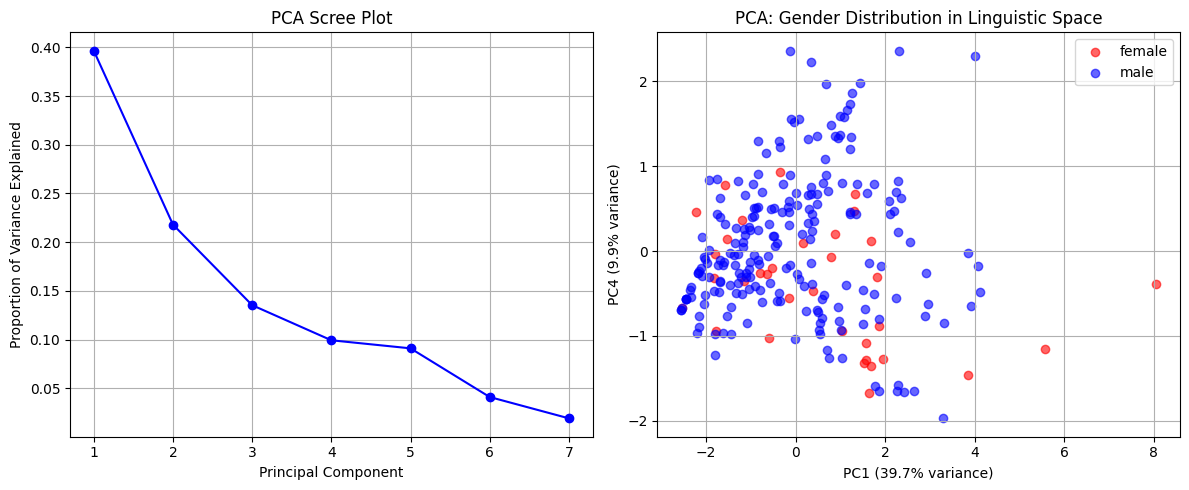


=== PCA FEATURE LOADINGS (First 4 Components) ===
                   PC1    PC2    PC3    PC4
prompt_length    0.448  0.330 -0.198 -0.360
ttr             -0.493  0.112  0.327 -0.198
sentence_count   0.500 -0.329 -0.037 -0.251
sentence_length  0.158  0.610 -0.294  0.592
opinion_score    0.236  0.184  0.827  0.268
sentiment        0.358  0.278  0.280 -0.333
iteration_count  0.312 -0.536  0.062  0.485

=== GENDER DIFFERENCES IN PRINCIPAL COMPONENTS ===
  variable  u_statistic  p_value  rank_biserial_r  effect_size_r  male_median  \
0      PC1       2986.5   0.1013           0.1752         0.1044      -0.2140   
1      PC2       4287.5   0.0852          -0.1841         0.1096      -0.0878   
2      PC3       3608.5   0.9753           0.0035         0.0021      -0.0571   
3      PC4       4751.5   0.0035          -0.3122         0.1859      -0.0740   

   female_median  male_mean  female_mean  male_n  female_n  significant  \
0         0.5890    -0.0941       0.5896     213        34      

In [322]:
# Select available features
available_features = [f for f in linguistic_features if f in grouped_full.columns]
pca_data = grouped_full[available_features + ['gender']].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data[available_features])
# Perform PCA
pca = PCA(n_components=min(len(available_features), 10))
X_pca = pca.fit_transform(X_scaled)

# Create PCA results DataFrame
pca_df = pd.DataFrame(
    X_pca, 
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
    index=pca_data.index
)
pca_df['gender'] = pca_data['gender'].values

# Plot PCA results
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA Scree Plot')
plt.grid(True)

# Biplot of first two components
plt.subplot(1, 2, 2)
colors = {'male': 'blue', 'female': 'red'}
for gender in pca_df['gender'].unique():
    mask = pca_df['gender'] == gender
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC4'], 
            c=colors.get(gender, 'gray'), label=gender, alpha=0.6)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)')
plt.title('PCA: Gender Distribution in Linguistic Space')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature loadings
loadings = pd.DataFrame(
    pca.components_[:4].T,  # First 4 components
    columns=[f'PC{i+1}' for i in range(4)],
    index=available_features
)
print("\n=== PCA FEATURE LOADINGS (First 4 Components) ===")
print(loadings.round(3))

# Test for gender differences in principal components
pc_results = []
for i in range(min(4, X_pca.shape[1])):
    pc_name = f'PC{i+1}'
    pca_df[pc_name] = X_pca[:, i]
    result = mann_whitney_test(pc_name, pca_df)
    pc_results.append(result)

pc_results_df = pd.DataFrame(pc_results)
if len(pc_results_df) > 0:
    pc_results_df['p_corrected_bh'] = false_discovery_control(pc_results_df['p_value'].values)
    pc_results_df['effect_interpretation'] = pc_results_df['effect_size_r'].apply(interpret_effect_size)

print("\n=== GENDER DIFFERENCES IN PRINCIPAL COMPONENTS ===")
print(pc_results_df.round(4))

In [79]:
pc_results_df.round(4)

,variable,u_statistic,p_value,rank_biserial_r,effect_size_r,male_median,female_median,male_mean,female_mean,male_n,female_n,significant,p_corrected_bh,effect_interpretation
0,PC1,1352.0,0.0000,0.4497,0.3859,-1.0590,-0.1973,-1.0620,0.8577,63,78,True,0.0000,medium
1,PC2,1777.0,0.0048,0.2768,0.2375,-0.7844,-0.0926,-0.3908,0.3156,63,78,True,0.0064,small
2,PC3,1433.0,0.0000,0.4168,0.3576,-0.4267,0.5589,-0.5044,0.4074,63,78,True,0.0000,medium
3,PC4,2789.0,0.1691,-0.1351,0.1159,0.0781,-0.0384,0.2424,-0.1958,63,78,False,0.1691,small


## 2. Machine Learning Classification


=== MACHINE LEARNING GENDER CLASSIFICATION ===
Random Forest Cross-validation Accuracy: 0.854 ± 0.033

=== TOP 10 MOST IMPORTANT FEATURES FOR GENDER CLASSIFICATION ===
           feature  importance
3  sentence_length    0.181931
5        sentiment    0.172891
0    prompt_length    0.171853
1              ttr    0.151219
4    opinion_score    0.141284
2   sentence_count    0.117612
6  iteration_count    0.063211


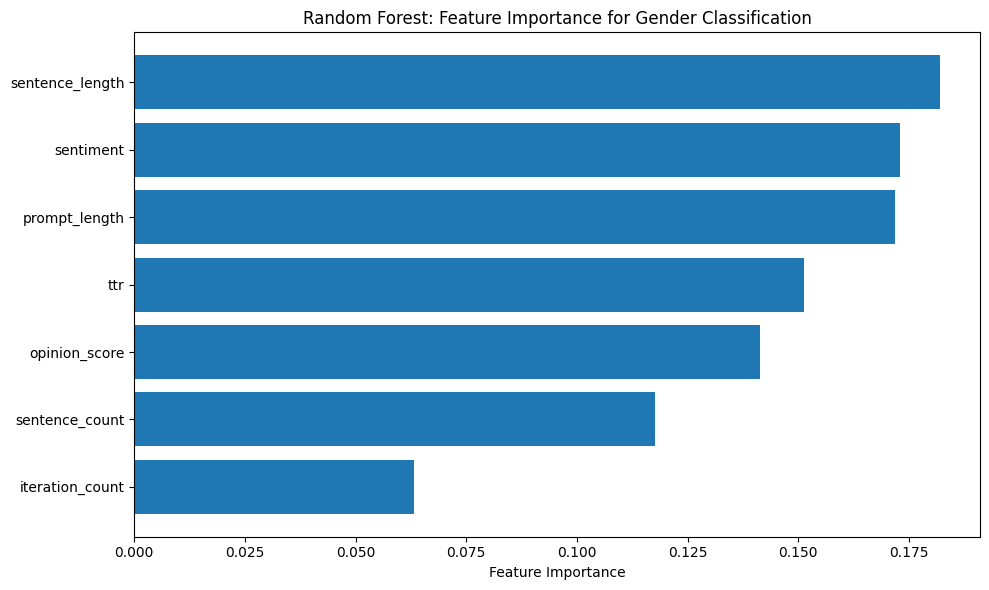

In [324]:
# Prepare data for classification
ml_features = available_features.copy()
ml_data = grouped_full[ml_features + ['gender']].dropna()
if len(ml_data) > 20:  # Minimum sample size for meaningful ML
    X = ml_data[ml_features]
    y = ml_data['gender']
    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-validation scores
    cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

    print(f"\n=== MACHINE LEARNING GENDER CLASSIFICATION ===")
    print(f"Random Forest Cross-validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    # Fit model to get feature importance
    rf_classifier.fit(X, y)
    feature_importance = pd.DataFrame({
        'feature': ml_features,
        'importance': rf_classifier.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n=== TOP 10 MOST IMPORTANT FEATURES FOR GENDER CLASSIFICATION ===")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(min(15, len(feature_importance))), 
            feature_importance.head(15)['importance'].values[::-1])
    plt.yticks(range(min(15, len(feature_importance))), 
            feature_importance.head(15)['feature'].values[::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest: Feature Importance for Gender Classification')
    plt.tight_layout()
    plt.show()

## 3. Personality as Moderator Analysis

In [368]:
grouped_conversations.columns


Index(['id', 'created_at_x', 'name', 'email', 'age', 'gender', 'education',
       'occupation', 'nationality', 'frequency_usage', 'english_fluency',
       'ai_usage', 'consent', 'familiarity', 'email_norm_x', 'dedupe_key',
       'id_x', 'created_at_y', 'extraversion_score', 'agreeableness_score',
       'conscientiousness_score', 'neuroticism_score', 'openness_score',
       'participant_id', 'id_y', 'email_norm_y'],
      dtype='object')

Unique participants in final dataset: 38
Gender distribution in final dataset:
gender
male      213
female     34
Name: count, dtype: int64

=== PERSONALITY TRAITS BY GENDER ===
                  variable  u_statistic  p_value  rank_biserial_r  \
0       extraversion_score       2614.0   0.5600           0.0664   
1      agreeableness_score       2883.0   0.7956          -0.0296   
2  conscientiousness_score       2730.0   0.8177           0.0250   
3        neuroticism_score       1328.5   0.0000           0.5255   
4           openness_score       3097.5   0.3511          -0.1062   

   effect_size_r  male_median  female_median  male_mean  female_mean  male_n  \
0         0.0377         2.50           3.00     2.7575       2.8929     200   
1         0.0168         3.50           3.00     3.3825       3.5179     200   
2         0.0142         3.00           3.00     3.2500       3.2857     200   
3         0.2981         3.00           4.25     2.9825       3.9464     200   
4      

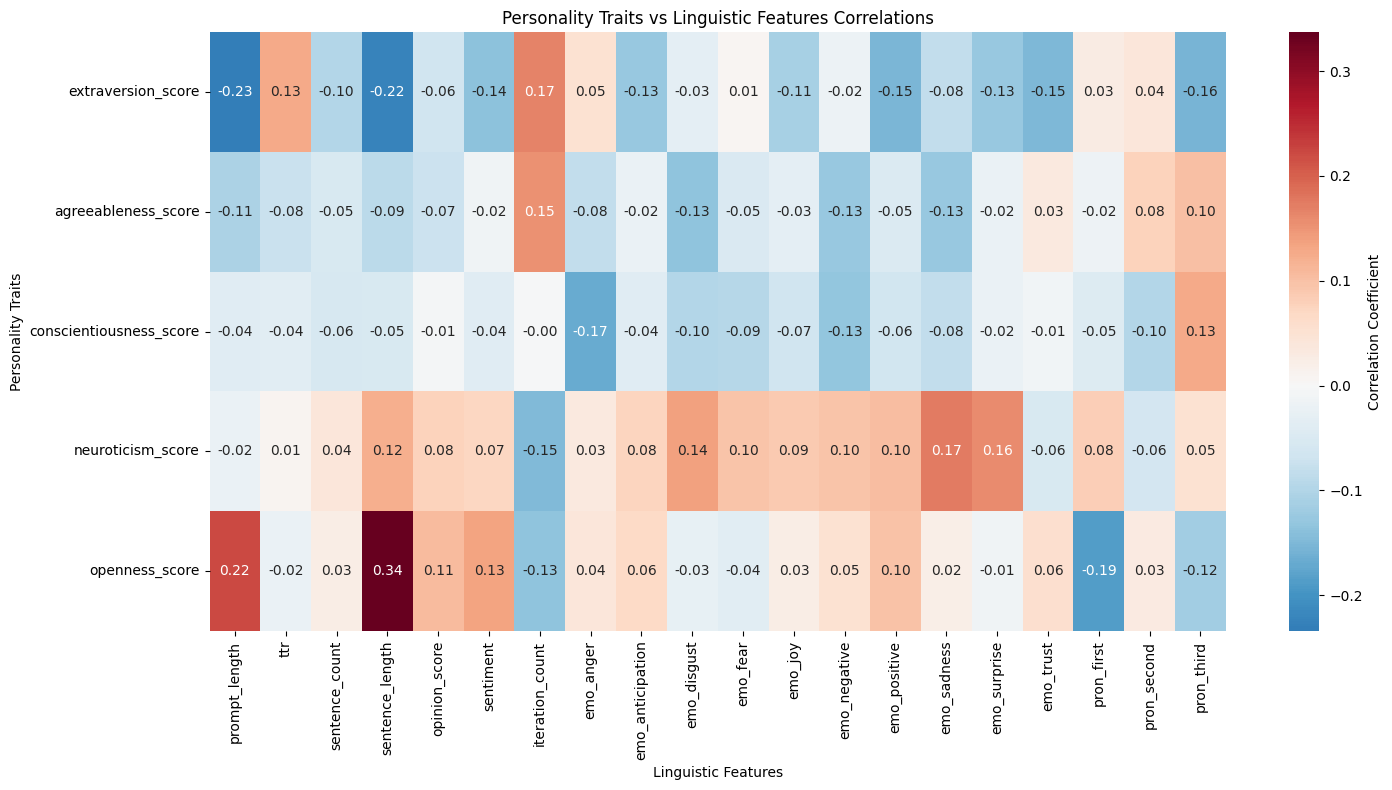


=== STRONGEST PERSONALITY-LINGUISTIC CORRELATIONS (|r| > 0.2) ===
    personality_trait linguistic_feature  correlation  p_value  significant
3      openness_score    sentence_length       0.3371   0.0001         True
0  extraversion_score      prompt_length      -0.2341   0.0014         True
1  extraversion_score    sentence_length      -0.2250   0.1497        False
2      openness_score      prompt_length       0.2226   0.0000         True

=== SAVING CORRECTED DATASET ===
Final dataset shape: (247, 30)
Use 'grouped_with_personality' for all future personality-related analyses.
Corrected dataset saved to 'grouped_conversations_with_personality.csv'

=== FINAL DATA SUMMARY ===
Total conversations: 247
Conversations with complete personality data: 228
Conversations with complete linguistic data: 247
Conversations with both personality and linguistic data: 228


In [373]:


# Check overlap in participant IDs
personality_participants = set(personality_test['participant_id'].unique())
conversation_participants = set(grouped_full['participant_id'].unique())

personality_scores = personality_test[[
    'participant_id', 'extraversion_score', 'agreeableness_score', 
    'conscientiousness_score', 'neuroticism_score', 'openness_score'
]].copy()

# Removing any duplicate participant_ids in personality data (keep first occurrence)
personality_scores = personality_scores.drop_duplicates(subset=['participant_id'], keep='first')

# Merging with grouped_full using participant_id directly
grouped_with_personality = grouped_full.merge(
    personality_scores, 
    on='participant_id', 
    how='left'  # Keeping all conversations, adding personality where available
)


# Checking the data quality
print(f"Unique participants in final dataset: {grouped_with_personality['participant_id'].nunique()}")
print(f"Gender distribution in final dataset:")
print(grouped_with_personality['gender'].value_counts())

print("\n=== PERSONALITY TRAITS BY GENDER ===")

personality_traits = ['extraversion_score', 'agreeableness_score', 'conscientiousness_score', 'neuroticism_score', 'openness_score']
available_traits = [trait for trait in personality_traits if trait in grouped_with_personality.columns]

if available_traits:
    personality_results = []
    for trait in available_traits:
        # Only analyzing participants who have both personality and conversation data
        trait_data = grouped_with_personality.dropna(subset=[trait, 'gender'])
        if len(trait_data) > 10:  # Minimum sample size
            result = mann_whitney_test(trait, trait_data)
            personality_results.append(result)

    if personality_results:
        personality_df = pd.DataFrame(personality_results)
        personality_df['p_corrected_bh'] = false_discovery_control(personality_df['p_value'].values)
        personality_df['effect_interpretation'] = personality_df['effect_size_r'].apply(interpret_effect_size)
        personality_df['significant_bh'] = personality_df['p_corrected_bh'] < 0.05

        print(personality_df.round(4))
        
        # Showing significant results
        sig_personality = personality_df[personality_df['significant_bh']]
        if len(sig_personality) > 0:
            print(f"\nSignificant personality differences:")
            for _, row in sig_personality.iterrows():
                direction = "Male > Female" if row['male_mean'] > row['female_mean'] else "Female > Male"
                print(f"  {row['variable']}: p_corr = {row['p_corrected_bh']:.4f}, effect = {row['effect_interpretation']}, {direction}")

# Corrected correlation analysis between personality and linguistic features
print("\n=== CORRECTED PERSONALITY-LINGUISTIC CORRELATIONS ===")

# Defining linguistic features (ensure they exist in our dataframe)
linguistic_features = [
    'prompt_length', 'ttr', 'sentence_count', 'sentence_length',
    'opinion_score', 'sentiment', 'iteration_count'
] + [col for col in grouped_with_personality.columns if col.startswith(('emo_', 'pron_'))]

available_features = [f for f in linguistic_features if f in grouped_with_personality.columns]

if len(available_traits) > 0 and len(available_features) > 0:
    # Only using complete cases for correlation analysis
    correlation_data = grouped_with_personality[available_traits + available_features].dropna()
    
    print(f"Sample size for correlation analysis: {len(correlation_data)}")
    
    if len(correlation_data) > 30:  # Minimum for meaningful correlations
        corr_matrix = correlation_data.corr()
        
        # Extracting personality-linguistic correlations
        personality_linguistic_corr = corr_matrix.loc[available_traits, available_features]
        
        # Creating the heatmap
        plt.figure(figsize=(15, 8))
        sns.heatmap(personality_linguistic_corr, annot=True, cmap='RdBu_r', 
                   center=0, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Personality Traits vs Linguistic Features Correlations')
        plt.xlabel('Linguistic Features')
        plt.ylabel('Personality Traits')
        plt.tight_layout()
        plt.show()
        
        # Find and report strongest correlations
        print("\n=== STRONGEST PERSONALITY-LINGUISTIC CORRELATIONS (|r| > 0.2) ===")
        corr_pairs = []
        for trait in available_traits:
            for feature in available_features:
                corr_val = personality_linguistic_corr.loc[trait, feature]
                if not pd.isna(corr_val) and abs(corr_val) > 0.2:
                    # Calculate p-value for this correlation
                    trait_data = correlation_data[trait]
                    feature_data = correlation_data[feature]
                    _, p_val = spearmanr(trait_data, feature_data)
                    
                    corr_pairs.append({
                        'personality_trait': trait,
                        'linguistic_feature': feature,
                        'correlation': corr_val,
                        'p_value': p_val,
                        'significant': p_val < 0.05
                    })
        
        if corr_pairs:
            corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', key=abs, ascending=False)
            print(corr_df.round(4))
        else:
            print("No correlations with |r| > 0.2 found.")
    else:
        print(f"Insufficient data for correlation analysis (n={len(correlation_data)})")

# Save the corrected dataframe for future use
print(f"\n=== SAVING CORRECTED DATASET ===")
print(f"Final dataset shape: {grouped_with_personality.shape}")
print("Use 'grouped_with_personality' for all future personality-related analyses.")

# Export the corrected dataset
grouped_with_personality.to_csv('grouped_conversations_with_personality.csv', index=False)
print("Corrected dataset saved to 'grouped_conversations_with_personality.csv'")

# Summary statistics
print(f"\n=== FINAL DATA SUMMARY ===")
print(f"Total conversations: {len(grouped_with_personality)}")
print(f"Conversations with complete personality data: {grouped_with_personality[available_traits].dropna().shape[0]}")
print(f"Conversations with complete linguistic data: {grouped_with_personality[available_features].dropna().shape[0]}")
print(f"Conversations with both personality and linguistic data: {grouped_with_personality[available_traits + available_features].dropna().shape[0]}")

In [374]:
grouped_with_personality.__len__()

247

## 4. Task Category Analysis

In [86]:
# Analyze differences by task category (if task categories are available)
if 'task_id' in grouped_conversations.columns:
    print("\n=== LINGUISTIC VARIATION BY TASK ===")
    # Summary statistics by task
    task_summary = grouped_conversations.groupby('task_id')[available_features[:5]].mean()
    print("Mean linguistic features by task:")
    print(task_summary.round(3))

    # Test if gender effects vary by task (interaction effects)
    # This is a simplified analysis - full factorial ANOVA would be better
    tasks = grouped_conversations['task_id'].unique()

    if len(tasks) > 1:
        task_gender_effects = []
        
        for task in tasks:
            task_data = grouped_conversations[grouped_conversations['task_id'] == task]
            
            if len(task_data[task_data['gender'] == 'male']) > 3 and \
            len(task_data[task_data['gender'] == 'female']) > 3:
                
                # Test a few key features for this task
                key_features = ['prompt_length', 'sentiment', 'iteration_count']
                for feature in key_features:
                    if feature in task_data.columns:
                        result = enhanced_mann_whitney_test(feature, task_data)
                        result['task_id'] = task
                        task_gender_effects.append(result)
        
        if task_gender_effects:
            task_effects_df = pd.DataFrame(task_gender_effects)
            print("\n=== GENDER EFFECTS BY TASK ===")
            print(task_effects_df[['task_id', 'variable', 'p_value', 'effect_size_r']].round(4))


=== LINGUISTIC VARIATION BY TASK ===
Mean linguistic features by task:
         prompt_length    ttr  sentence_count  sentence_length  opinion_score
task_id                                                                      
1               38.609  0.613          10.391           12.557          0.420
2               55.200  0.668           9.600           14.070          0.379
3               32.357  0.770           6.214           13.900          0.426
4               16.167  0.780           5.750           11.135          0.541
5               33.833  0.792           6.083           14.524          0.299
6               50.182  0.795           5.000           14.135          0.409
9               42.000  0.804           5.091            9.485          0.383
10              33.273  0.804           5.909            9.858          0.522
11              44.636  0.798           4.364           11.752          0.418
12              45.909  0.791           5.000           12.353        